<a href="https://colab.research.google.com/github/glenncyop/ADALL/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1

In [6]:
print("Hello, World!")

Hello, World!


In [7]:
import pandas as pd
# Example: Replace this with the raw URL of your GitHub file
github_raw_url = 'https://raw.githubusercontent.com/glenncyop/ADALL/main/laptop_prices_2024_sgd_TL.csv'
try:
    df = pd.read_csv(github_raw_url)
    print("Successfully loaded data from GitHub!")
    display(df.head())
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure the URL is correct and the file format is compatible with `pd.read_csv`.")

Successfully loaded data from GitHub!


,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# •What does one row represent, and what is the target?
# –Identify what each row means in real life. Confirm the target variable and its type (numeric, binary, multi-class).


In [9]:
display(df.head())

,Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
0,Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.80
1,Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
2,Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
3,Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
4,Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.30


### What does one row represent?

Based on the column names like 'Brand', 'Model', 'CPU', 'RAM', 'Storage', 'Graphics Card', 'Display', 'Operating System', 'Price (SGD)', and 'Price (TL)' from the `df` DataFrame, it's clear that **each row represents a unique laptop model with its specific features and pricing information.**

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Model             1000 non-null   object 
 2   CPU               1000 non-null   object 
 3   GPU               1000 non-null   object 
 4   RAM_GB            1000 non-null   int64  
 5   Storage_Type      1000 non-null   object 
 6   Storage_GB        1000 non-null   int64  
 7   Touchscreen       1000 non-null   bool   
 8   Weight_kg         1000 non-null   float64
 9   Screen_Size_inch  1000 non-null   float64
 10  Discount_percent  1000 non-null   float64
 11  Price_SGD         1000 non-null   float64
 12  Brand_Discount    1000 non-null   int64  
 13  Member_Discount   1000 non-null   float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 102.7+ KB
None


### What is the target variable and its type?

Given the context of a laptop price dataset, the most likely target variables for a predictive model would be the prices. From the column names and the `df.info()` output, we can identify two potential target variables:

*   **`Price (SGD)`**: This represents the price of the laptop in Singapore Dollars.
*   **`Price (TL)`**: This represents the price of the laptop in Turkish Lira.

Both `Price (SGD)` and `Price (TL)` are of **numeric (float64)** type. The choice between these two would depend on the specific prediction task (e.g., predicting price in SGD or TL).

In [14]:
# check no. of rows and columns
print(df.shape)

(1000, 14)


In [12]:
#check for missing values
print(df.isnull().sum())

Brand               0
Model               0
CPU                 0
GPU                 0
RAM_GB              0
Storage_Type        0
Storage_GB          0
Touchscreen         0
Weight_kg           0
Screen_Size_inch    0
Discount_percent    0
Price_SGD           0
Brand_Discount      0
Member_Discount     0
dtype: int64


In [15]:
# check for duplicate
print(df.duplicated().sum())

0


Text(0, 0.5, 'Count')

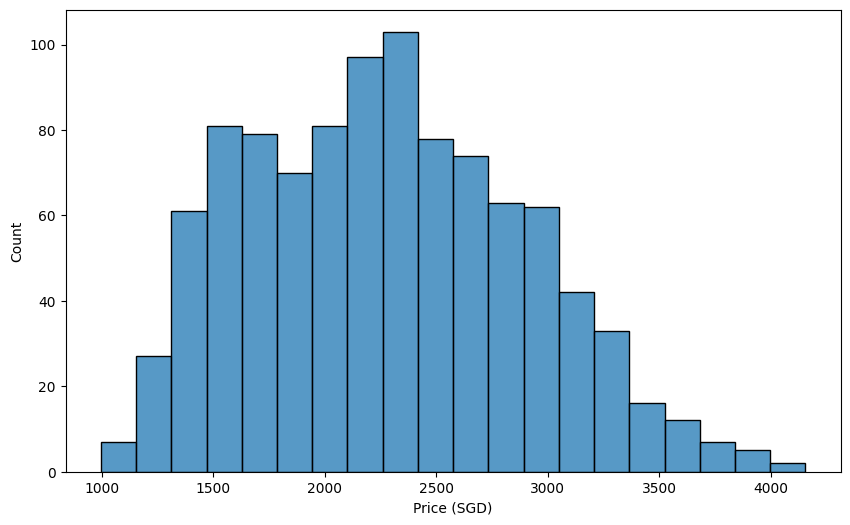

In [11]:
#plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_SGD'], bins=20)
plt.xlabel('Price (SGD)')
plt.ylabel('Count')


In [13]:
#check for outliers
print(df.describe())

            RAM_GB   Storage_GB    Weight_kg  Screen_Size_inch  \
count  1000.000000  1000.000000  1000.000000       1000.000000   
mean     53.128000  1505.024000     2.036560         15.645700   
std      44.413288  1380.203919     0.746477          1.759846   
min       8.000000   256.000000     1.000000         13.300000   
25%      16.000000   512.000000     1.340000         14.000000   
50%      32.000000  1024.000000     1.970000         15.600000   
75%      64.000000  2048.000000     2.680000         17.300000   
max     128.000000  4096.000000     3.500000         18.400000   

       Discount_percent    Price_SGD  Brand_Discount  Member_Discount  
count       1000.000000  1000.000000       1000.0000      1000.000000  
mean           7.538230  2277.796410          6.7680       135.810660  
std            4.334012   616.496246          2.6346        41.344593  
min            0.000000   995.770000          3.0000        50.740000  
25%            3.815000  1776.212500         